In [149]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [150]:
df = pd.read_excel("data.xls")


In [151]:
# Data Preprocessing

cols = ['_id', 'battery', 'distance', 'location', 'name', 'source', 'ward_id']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('time')

   
df['time'] = pd.to_datetime(df['time'], unit='ms')


df = df[['time','pm25']]
df.isnull().sum()

time    0
pm25    0
dtype: int64

In [152]:
df.describe



<bound method NDFrame.describe of                     time  pm25
0    2019-07-01 18:30:26    19
1    2019-07-01 18:31:26    15
2    2019-07-01 18:32:26    13
3    2019-07-01 18:33:27    15
4    2019-07-01 18:34:27    15
...                  ...   ...
8191 2019-07-07 11:52:42    14
8192 2019-07-07 11:53:42    14
8193 2019-07-07 11:54:42    15
8194 2019-07-07 11:56:25    13
8195 2019-07-07 11:56:42    13

[8196 rows x 2 columns]>

In [153]:
test1=df[7500:]
test_xcoord = test1['time'].dt.time.to_numpy()
test_xcoord

array([datetime.time(0, 14, 34), datetime.time(0, 15, 34),
       datetime.time(0, 16, 34), datetime.time(0, 17, 34),
       datetime.time(0, 18, 34), datetime.time(0, 19, 34),
       datetime.time(0, 20, 34), datetime.time(0, 21, 34),
       datetime.time(0, 22, 34), datetime.time(0, 23, 34),
       datetime.time(0, 24, 33), datetime.time(0, 25, 33),
       datetime.time(0, 26, 33), datetime.time(0, 27, 33),
       datetime.time(0, 28, 33), datetime.time(0, 29, 33),
       datetime.time(0, 30, 33), datetime.time(0, 31, 33),
       datetime.time(0, 32, 33), datetime.time(0, 33, 33),
       datetime.time(0, 34, 33), datetime.time(0, 35, 33),
       datetime.time(0, 36, 33), datetime.time(0, 37, 33),
       datetime.time(0, 38, 33), datetime.time(0, 39, 33),
       datetime.time(0, 40, 33), datetime.time(0, 41, 33),
       datetime.time(0, 42, 33), datetime.time(0, 43, 33),
       datetime.time(0, 44, 33), datetime.time(0, 45, 33),
       datetime.time(0, 46, 33), datetime.time(0, 47, 33

In [154]:
#df = df.groupby('time')['pm25'].mean().reset_index()
df = df.set_index('time')
df.index
df.describe()

,pm25
count,8196.000000
mean,18.451928
std,7.802583
min,4.000000
25%,13.000000
50%,17.000000
75%,23.000000
max,86.000000


In [155]:
train=df[0:7500] 
test=df[7500:]
train.head()


,pm25
time,
2019-07-01 18:30:26,19
2019-07-01 18:31:26,15
2019-07-01 18:32:26,13
2019-07-01 18:33:27,15
2019-07-01 18:34:27,15


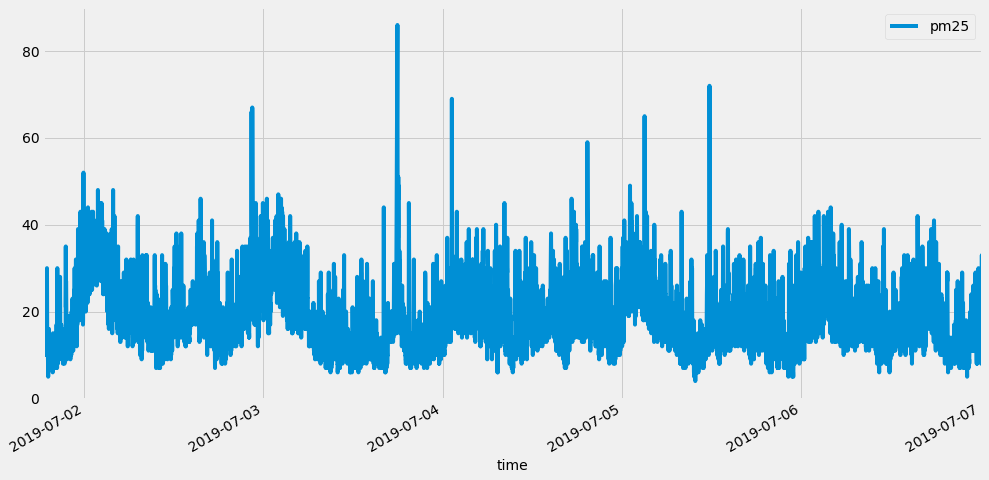

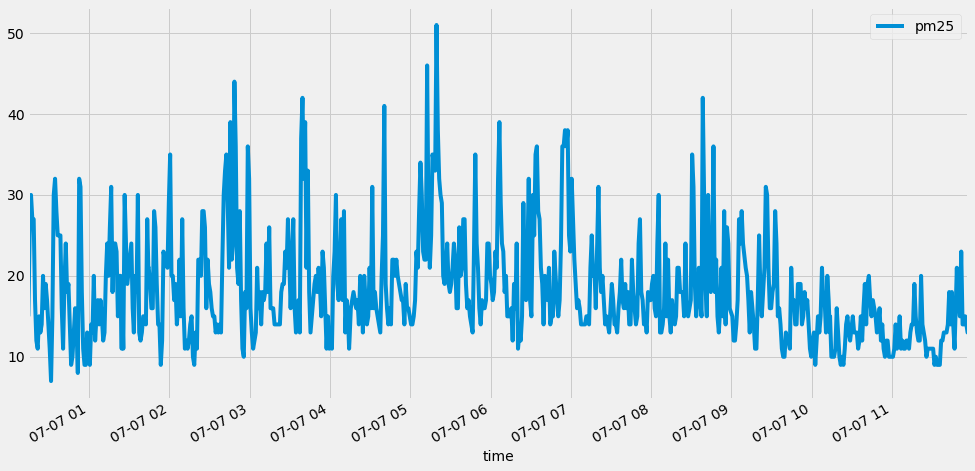

In [156]:
train.plot(figsize=(15,8), fontsize=14)
test.plot(figsize=(15,8), fontsize=14)
plt.show()


In [157]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



training_set = train.iloc[:].values
training_set

array([[19],
       [15],
       [13],
       ...,
       [16],
       [15],
       [14]], dtype=int64)

In [158]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 7500):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units =  150, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)





Epoch 1/100
7440/7440 [==============================] - 109s 15ms/step - loss: 0.0069
Epoch 2/100
7440/7440 [==============================] - 106s 14ms/step - loss: 0.0056
Epoch 3/100
7440/7440 [==============================] - 107s 14ms/step - loss: 0.0045
Epoch 4/100
7440/7440 [==============================] - 106s 14ms/step - loss: 0.0040
Epoch 5/100
7440/7440 [==============================] - 106s 14ms/step - loss: 0.0040
Epoch 6/100
7440/7440 [==============================] - 105s 14ms/step - loss: 0.0040
Epoch 7/100
7440/7440 [==============================] - 104s 14ms/step - loss: 0.0039
Epoch 8/100
7440/7440 [==============================] - 104s 14ms/step - loss: 0.0039
Epoch 9/100
7440/7440 [==============================] - 104s 14ms/step - loss: 0.0040
Epoch 10/100
7440/7440 [==============================] - 104s 14ms/step - loss: 0.0039
Epoch 11/100
7440/7440 [==============================] - 105s 14ms/step - loss: 0.0039
Epoch 12/100
7440/7440 [=================

7440/7440 [==============================] - 108s 14ms/step - loss: 0.0037
Epoch 95/100
7440/7440 [==============================] - 107s 14ms/step - loss: 0.0037
Epoch 96/100
7440/7440 [==============================] - 107s 14ms/step - loss: 0.0037
Epoch 97/100
7440/7440 [==============================] - 107s 14ms/step - loss: 0.0037
Epoch 98/100
7440/7440 [==============================] - 107s 14ms/step - loss: 0.0037
Epoch 99/100
7440/7440 [==============================] - 107s 14ms/step - loss: 0.0037
Epoch 100/100
7440/7440 [==============================] - 109s 15ms/step - loss: 0.0036


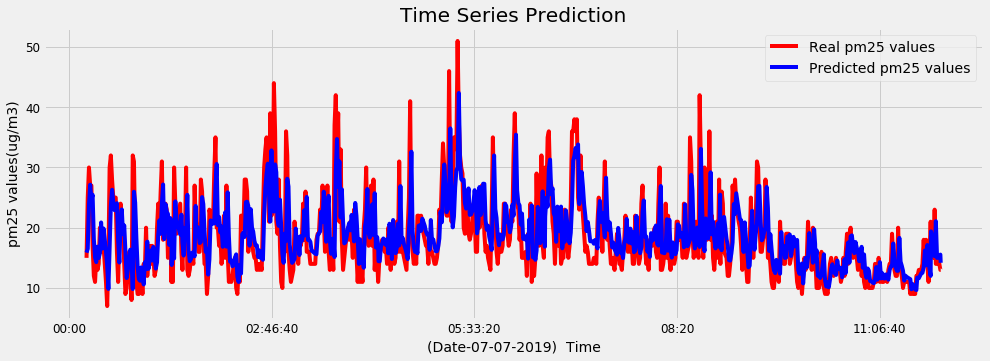

The Mean Squared Error of our forecasts is 29.56


In [161]:

real_stock_price = test.iloc[:].values


dataset_total = pd.concat((train['pm25'], test['pm25']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 756):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.figure(figsize=(15,5))
plt.plot(test_xcoord,real_stock_price, color = 'red', label = 'Real pm25 values')
plt.plot(test_xcoord,predicted_stock_price, color = 'blue', label = 'Predicted pm25 values')
plt.title('Time Series Prediction')
plt.xlabel('(Date-07-07-2019)  Time')
plt.ylabel('pm25 values(ug/m3)')
plt.legend()
plt.show()

mse = ((predicted_stock_price - real_stock_price) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 29.56
